<ipython-input-21-d2aa65987427>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados_c1 = pd.read_csv(c1, delim_whitespace=True, header=None, names=["Valores", "Tempo"])
<ipython-input-21-d2aa65987427>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados_c2 = pd.read_csv(c2, delim_whitespace=True, header=None, names=["Valores", "Tempo"])


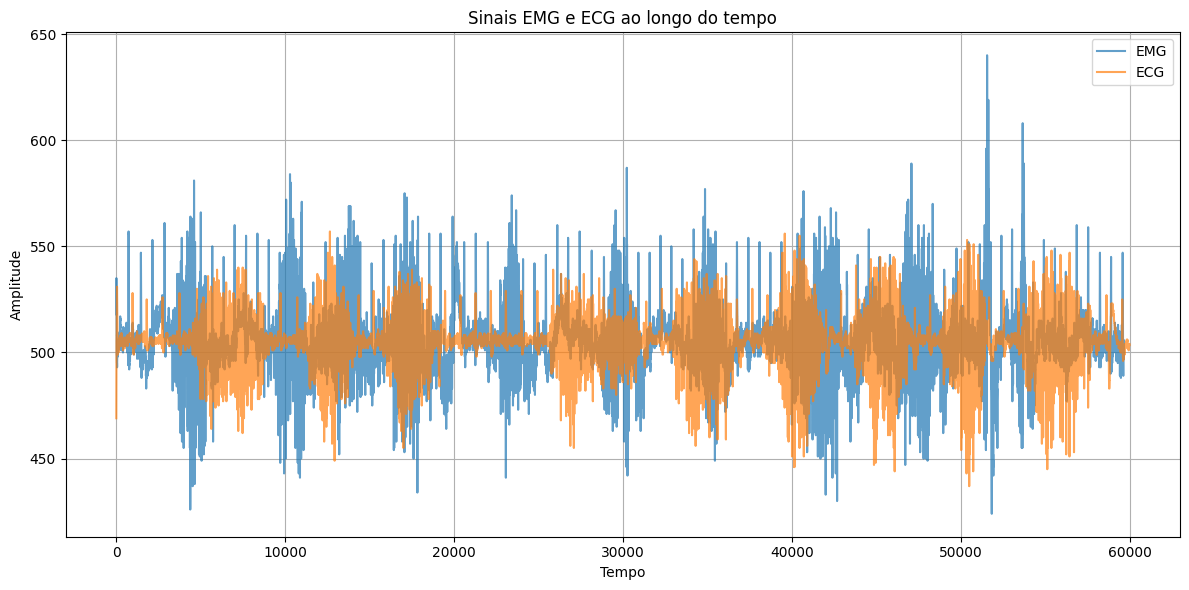

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados dos arquivos
c1 = "/content/C1.txt"
c2 = "/content/C2.txt"

# Carregar os dados em dataframes
dados_c1 = pd.read_csv(c1, delim_whitespace=True, header=None, names=["Valores", "Tempo"])
dados_c2 = pd.read_csv(c2, delim_whitespace=True, header=None, names=["Valores", "Tempo"])

# Plotar os sinais EMG e ECG ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(dados_c1['Tempo'], dados_c1['Valores'], label='EMG', alpha=0.7)
plt.plot(dados_c2['Tempo'], dados_c2['Valores'], label='ECG', alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinais EMG e ECG ao longo do tempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

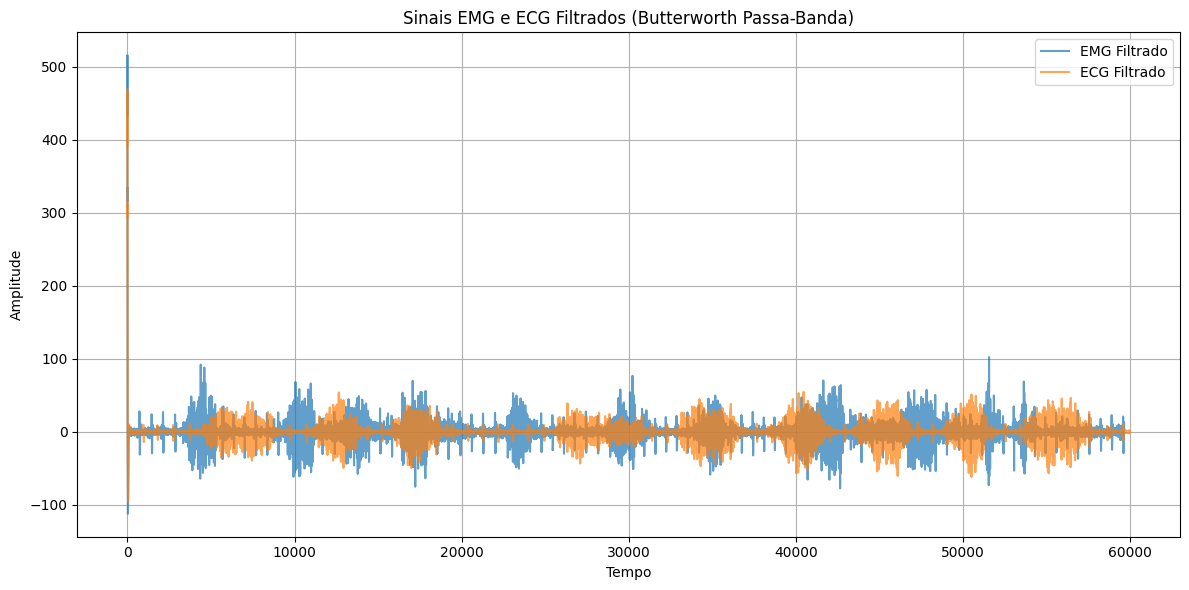

In [22]:
# eliminar ruídos DC, com frequência entre 10 Hz e 470 Hz;

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

# Função para criar o filtro Butterworth passa-banda
def filtro_butterworth(freq_baixa, freq_alta, fs, ordem=2):
    nyq = 0.5 * fs
    baixa = freq_baixa / nyq
    alta = freq_alta / nyq
    b, a = butter(ordem, [baixa, alta], btype='band')
    return b, a

# Função para aplicar o filtro
def aplica_filtro(data, freq_baixa, freq_alta, fs, ordem=2):
    b, a = filtro_butterworth(freq_baixa, freq_alta, fs, ordem=ordem)
    y = lfilter(b, a, data)
    return y

# Frequência de amostragem
fs = 1000

# Frequências de corte para o filtro passa-banda
freq_baixa = 10  # 10 Hz
freq_alta = 470  # 470 Hz


# Aplicar o filtro aos dados EMG
c1_filtrado = aplica_filtro(dados_c1['Valores'], freq_baixa, freq_alta, fs)

# Aplicar o filtro aos dados ECG
c2_filtrado = aplica_filtro(dados_c2['Valores'], freq_baixa, freq_alta, fs)


# Plotar os sinais EMG e ECG filtrados
plt.figure(figsize=(12, 6))
plt.plot(dados_c1['Tempo'], c1_filtrado, label='EMG Filtrado', alpha=0.7)
plt.plot(dados_c2['Tempo'], c2_filtrado, label='ECG Filtrado', alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinais EMG e ECG Filtrados (Butterworth Passa-Banda)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

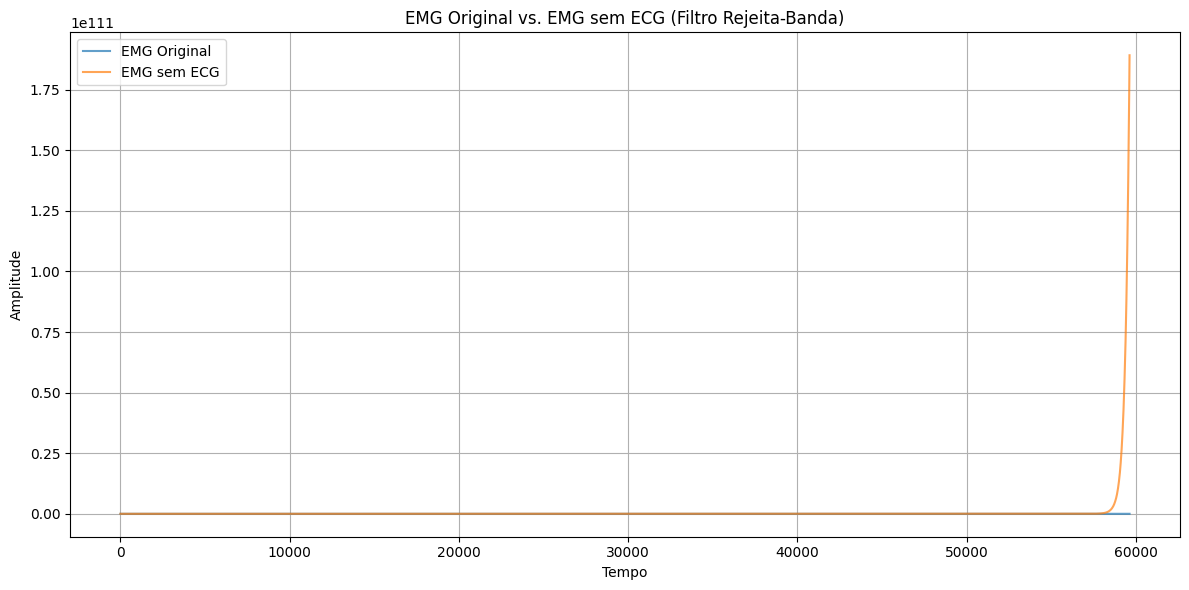

In [23]:
# prompt: Agora Utilizando métodos de filtragem no domínio da frequência, elimine o sinal
# de ECG;
# Frequência de amostragem (ajuste conforme necessário)
fs = 1000  # Exemplo: 1000 Hz

# ---  FILTRO PARA REMOVER ECG ---
# Frequências de corte para o filtro rejeita-banda (eliminar ECG)
freq_baixa_ecg = 0.5 #Frequência inferior da banda de rejeição (ECG)
freq_alta_ecg = 45 #Frequência superior da banda de rejeição (ECG)


def filtro_butter_rejeitabanda(freq_baixa, freq_alta, fs, ordem=5):
    nyq = 0.5 * fs
    baixa = freq_baixa / nyq
    alta = freq_alta / nyq
    b, a = butter(ordem, [baixa, alta], btype='bandstop')
    return b, a

def aplica_butter_rejeitabanda(data, freq_baixa, freq_alta, fs, ordem=5):
    b, a = filtro_butter_rejeitabanda(freq_baixa, freq_alta, fs, ordem=ordem)
    y = lfilter(b, a, data)
    return y


# Aplicar o filtro rejeita-faixa ao sinal EMG para remover o ECG
c1_filtrado_no_ecg = aplica_butter_rejeitabanda(dados_c1['Valores'], freq_baixa_ecg, freq_alta_ecg, fs)


# Plotar os sinais EMG original e filtrado
plt.figure(figsize=(12, 6))
plt.plot(dados_c1['Tempo'], dados_c1['Valores'], label='EMG Original', alpha=0.7)
plt.plot(dados_c1['Tempo'], c1_filtrado_no_ecg, label='EMG sem ECG', alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('EMG Original vs. EMG sem ECG (Filtro Rejeita-Banda)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


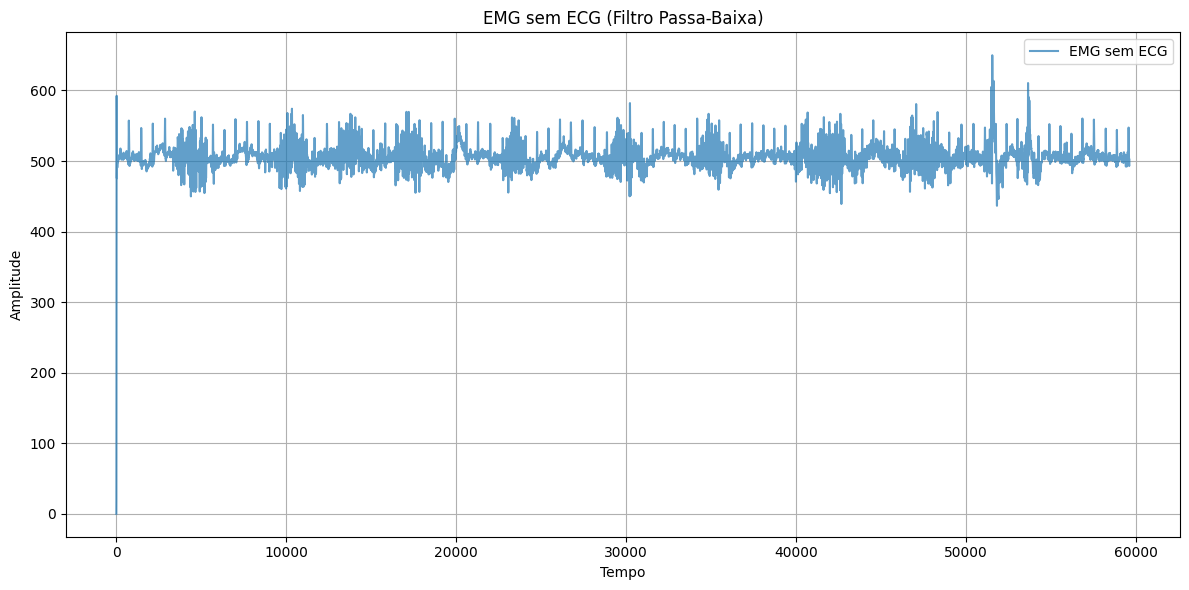

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def filtro_butter_passabaixa(freq_corte, fs, ordem=5):
    nyq = 0.5 * fs
    corte = freq_corte / nyq
    b, a = butter(ordem, corte, btype='low', analog=False)
    return b, a

# Função para aplicar o filtro passa-baixa
def aplica_butter_passabaixa(data, freq_corte, fs, ordem=5):
    b, a = filtro_butter_passabaixa(freq_corte, fs, ordem=ordem)
    y = lfilter(b, a, data)
    return y

# Frequência de amostragem
fs = 1000

# Frequência de corte para o filtro passa-baixa
freq_corte = 45  # 45 Hz, para remover componentes de ECG acima desta frequência

# Aplicar o filtro aos dados EMG para remover o ECG
c1_filtrado_no_ecg = aplica_butter_passabaixa(dados_c1['Valores'], freq_corte, fs)

# Plotar o sinal EMG filtrado
plt.figure(figsize=(12, 6))
plt.plot(dados_c1['Tempo'], c1_filtrado_no_ecg, label='EMG sem ECG', alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('EMG sem ECG (Filtro Passa-Baixa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
